In [1]:
import pickle as pk
from utils.utils import graph_plot
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
file='experimento_sinNorm_3T1N_10rep_6pasos.pkl'
with open(file, 'rb') as f:
    exp_dict = pk.load(f)

print(exp_dict[0].keys())

dict_keys(['free_hist', 'reconfig_hist', 'L2reconfig', 'max_c', 'c_config', 'c_L2'])


In [3]:
print(len(exp_dict))

10


In [4]:
Ki=0
free_hist=exp_dict[Ki]['free_hist']
reconfig_hist=exp_dict[Ki]['reconfig_hist']
max_c=exp_dict[Ki]['max_c']
c_config=exp_dict[Ki]['c_config']    
c_L2=exp_dict[Ki]['c_L2']

In [5]:
for i in range(len(exp_dict)):
    print(exp_dict[i]['c_config'])

[-17.322725322537934, -16.812049490015326, -17.373355914241102, -18.49962600041148, -18.619151220851446, -18.01340485119415, -17.683961637921723, -17.51496911884551, -17.78725919672506, -19.361383293075683, -19.450435467478936, -19.113879501475253, -18.429469716361528, -18.18258613901062, -17.487554218608366, -17.681766993550948, -17.012141789737328, -16.674423283287876, -16.393008248936894, -16.48309322745875, -16.402486789990196, -16.330225317908187, -15.935663053611941, -16.17517354145206, -16.110716569423488, -16.52140171599285, -17.03521606621338, -17.417772390295102, -18.032368743540154, -18.460692347001775, -18.30372200060641, -18.31239926029285, -18.72488692599619, -19.442494376854384, -19.738144473473458, -20.61784939694349, -19.65651383852626, -20.214283509295907, -19.686688798720507, -20.17914738950918, -20.03104826960625, -20.27393116171223, -19.713529500969805, -19.095145419415584, -18.284885901075253, -18.553030402216827, -18.10810751101848, -18.629321628812175, -19.24040

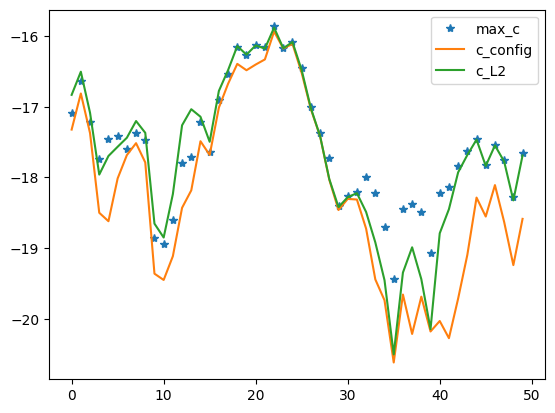

In [6]:
plt.plot(max_c,'*',label='max_c')
plt.plot(c_config, label='c_config')
plt.plot(c_L2, label='c_L2')
plt.legend()

In [7]:
from cProfile import label
from matplotlib import legend


matr_diff_E=np.empty((len(exp_dict),len(exp_dict[0]['max_c'])))
matr_diff_L2=np.empty((len(exp_dict),len(exp_dict[0]['max_c'])))
for exp in range(len(exp_dict)):
    max_c=np.array(exp_dict[exp]['max_c'])
    c_config=np.array(exp_dict[exp]['c_config'])
    c_L2=np.array(exp_dict[exp]['c_L2'])
    matr_diff_E[exp,:]=(-(max_c-c_config)/max_c)*100
    matr_diff_L2[exp,:]=(-(max_c-c_L2)/max_c)*100
        
#plt.plot(max_c,label='max_c')
#plt.plot(c_config, label='c_config')
     

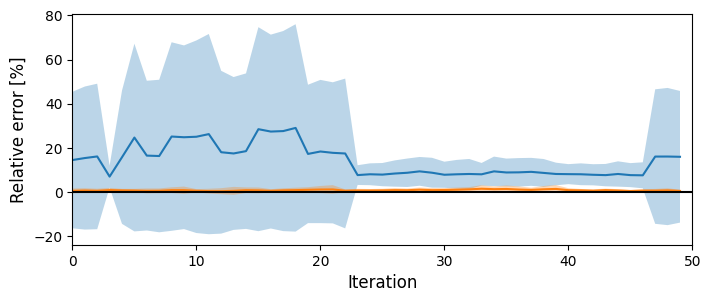

In [8]:
from calendar import c


mediasE = np.mean(matr_diff_E, axis=0)
stdE = np.std(matr_diff_E, axis=0)

mediasL2 = np.mean(matr_diff_L2, axis=0)
stdL2 = np.std(matr_diff_L2, axis=0)
fig3, ax3 = plt.subplots(1,1,figsize=(8,3)) 
ax3.plot(mediasE, label='EGNN')
ax3.fill_between(range(len(mediasE)), mediasE-stdE, mediasE+stdE, alpha=0.3)
ax3.plot(mediasL2, label='Max L2')
ax3.fill_between(range(len(mediasL2)), mediasL2-stdL2, mediasL2+stdL2, alpha=0.3)
# for i in range(matr_diff.shape[0]):
#    plt.plot(matr_diff[i,:])
ax3.hlines(0,0,len(mediasE),colors='k')
#plt.legend( fontsize=12)
plt.ylabel('Relative error [%]', fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.xlim(0,len(mediasE))
plt.savefig(f"10runs_dynamics_5step.pdf", format='pdf', bbox_inches='tight', dpi=300)
